# Chapter 5: Evaluating Predictive Performance

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.


## Import required packages

In [1]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt


!pip install scikit-plot
import scikitplot as skplt
!pip install dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart


Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Looking in indexes: http://mirrors.aliyun.com/pypi/simple


## Load file and generate training and validation sets. 


* load the Toyota Corolla file
* remove variables Model, ID, Price, Fuel Type and COlor from the model
* create training and validation data sets
* fit a regression model predicting the price

In [2]:
car_df = pd.read_csv("ToyotaCorolla.csv")

In [3]:
car_df.shape

(1436, 39)

In [4]:
car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [5]:
excluded_columns = ('Price','ID','Model','Color','Fuel_Type')
outcome = 'Price'
predictors = [s for s in car_df.columns if s not in excluded_columns]

In [6]:
outcome

'Price'

In [7]:
predictors

['Id',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'HP',
 'Met_Color',
 'Automatic',
 'CC',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Parking_Assistant',
 'Tow_Bar']

In [8]:
X = car_df[predictors]
y = car_df[outcome]

In [9]:
X

,Id,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,23,10,2002,46986,90,1,0,2000,3,...,1,1,0,0,0,1,0,0,0,0
1,2,23,10,2002,72937,90,1,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
2,3,24,9,2002,41711,90,1,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
3,4,26,7,2002,48000,90,0,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
4,5,30,3,2002,38500,90,0,0,2000,3,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,69,12,1998,20544,86,1,0,1300,3,...,1,1,0,1,1,1,0,0,0,0
1432,1439,72,9,1998,19000,86,0,0,1300,3,...,0,1,0,0,1,1,0,0,0,0
1433,1440,71,10,1998,17016,86,0,0,1300,3,...,0,1,0,0,0,1,0,0,0,0
1434,1441,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,0,0,1,0,0,0,0


In [10]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=.3, random_state=10)

In [11]:
print(train_X.shape)
valid_X.shape

(1005, 35)


(431, 35)

In [12]:
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

LinearRegression()

In [13]:
car_lm.intercept_

-40604.39172053728

In [14]:
car_lm.coef_

array([ 1.45037827e+00, -1.46894237e+02, -1.16350650e+02,  2.19370740e+01,
       -1.25728362e-02,  3.05000792e+01,  6.97444086e+00,  2.44832677e+02,
       -1.60172855e+00,  1.64850386e+01, -1.13118404e-11,  2.39602126e+02,
        9.13286072e+00,  1.17781255e+01,  2.47311227e+02,  3.94026044e+02,
        5.46316962e+01, -1.52847405e+02, -8.38773765e+01, -1.96161380e+01,
        2.57955125e+02,  2.27028305e+03, -1.27398763e+02,  9.97050289e+01,
       -7.99800736e+01,  2.84404355e+02,  6.35024099e+01,  1.29329418e+03,
        1.22730651e+02,  2.37692374e+02, -1.60250782e+02,  1.42233935e+02,
       -1.34289490e+03, -3.90767536e+02, -1.84194918e+02])

In [15]:
regressionSummary(train_y, car_lm.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1090.9372
            Mean Absolute Error (MAE) : 794.4673
          Mean Percentage Error (MPE) : -1.0207
Mean Absolute Percentage Error (MAPE) : 8.0159


In [16]:
pred_y = car_lm.predict(train_X)

In [17]:
pred_y

array([ 8606.10265275, 14983.5184447 , 10029.13787252, ...,
       10114.25613408,  7121.45947135,  8241.74584569])

In [18]:
from dmba import adjusted_r2_score

In [19]:
adjusted_r2_score(train_y, pred_y,car_lm)

0.9025710813694088

In [20]:
result = pd.DataFrame({'predicted': pred_y,
                       'actual': train_y,
                       'residuals': train_y - pred_y})

In [21]:
result

,predicted,actual,residuals
774,8606.102653,9750,1143.897347
41,14983.518445,16750,1766.481555
827,10029.137873,9650,-379.137873
1122,9075.505893,7460,-1615.505893
823,9141.576169,10500,1358.423831
...,...,...,...
1393,8264.674204,7250,-1014.674204
1344,8811.787864,8950,138.212136
527,10114.256134,9950,-164.256134
1149,7121.459471,8050,928.540529


In [22]:
car_lm_predict = car_lm.predict(valid_X)
car_lm_predict.shape

(431,)

In [23]:
result = pd.DataFrame({'predicted': car_lm_predict,
                       'actual': valid_y,
                       'residual': valid_y - car_lm_predict})

In [24]:
result.head(10)

,predicted,actual,residual
995,9304.264144,9950,645.735856
514,10108.502584,10500,391.497416
612,8382.639894,7750,-632.639894
307,12490.976737,13500,1009.023263
981,9714.607763,9750,35.392237
323,11746.967050,11250,-496.967050
494,10863.917154,11950,1086.082846
1275,7740.148131,7250,-490.148131
35,15011.813111,15750,738.186889
1002,9872.577122,8250,-1622.577122


In [25]:
regressionSummary(train_y, pred_y)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1090.9372
            Mean Absolute Error (MAE) : 794.4673
          Mean Percentage Error (MPE) : -1.0207
Mean Absolute Percentage Error (MAPE) : 8.0159


In [26]:
regressionSummary(valid_y, car_lm_predict)


Regression statistics

                      Mean Error (ME) : 167.0344
       Root Mean Squared Error (RMSE) : 1573.4276
            Mean Absolute Error (MAE) : 883.6257
          Mean Percentage Error (MPE) : 0.1582
Mean Absolute Percentage Error (MAPE) : 8.3663


In [27]:
adjusted_r2_score(train_y, pred_y, car_lm)

0.9025710813694088

In [28]:
adjusted_r2_score(valid_y, car_lm_predict, car_lm)

0.8112606123185708

In [29]:
car_df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [30]:
predictors_2 = ['KM','Automatic','CC','Doors','Boardcomputer','Color']

In [31]:
X2 = pd.get_dummies(car_df[predictors_2], drop_first=True)

In [32]:
X2.head()

,KM,Automatic,CC,Doors,Boardcomputer,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,46986,0,2000,3,1,0,1,0,0,0,0,0,0,0
1,72937,0,2000,3,1,0,0,0,0,0,1,0,0,0
2,41711,0,2000,3,1,0,1,0,0,0,0,0,0,0
3,48000,0,2000,3,1,1,0,0,0,0,0,0,0,0
4,38500,0,2000,3,1,1,0,0,0,0,0,0,0,0


In [33]:
y2=car_df[outcome]

In [34]:
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X2, y2, test_size=.25, random_state=123)

In [35]:
car_lm2 = LinearRegression()
car_lm2.fit(train_X2, train_y2)

LinearRegression()

In [36]:
regressionSummary(valid_y2, car_lm2.predict(valid_X2))


Regression statistics

                      Mean Error (ME) : -25.4134
       Root Mean Squared Error (RMSE) : 2388.0970
            Mean Absolute Error (MAE) : 1695.6880
          Mean Percentage Error (MPE) : -3.9314
Mean Absolute Percentage Error (MAPE) : 15.4367


In [37]:
regressionSummary(valid_y,car_lm.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 167.0344
       Root Mean Squared Error (RMSE) : 1573.4276
            Mean Absolute Error (MAE) : 883.6257
          Mean Percentage Error (MPE) : 0.1582
Mean Absolute Percentage Error (MAPE) : 8.3663


In [38]:
adjusted_r2_score(valid_y2, car_lm2.predict(valid_X2), car_lm2)

0.5792455559560996

In [39]:
adjusted_r2_score(valid_y, car_lm.predict(valid_X), car_lm)

0.8112606123185708

## Create a distribution of the residuals

* calculate the residual values for the training set
* calculate the residual values for the validation set
* create a historgram of the residual values for normality check
* create a boxplot of the residuals for possible outlier check

In [40]:
pred_error_train = pd.DataFrame({'residual': train_y-car_lm.predict(train_X),
                                'data_set': 'training'})
pred_error_valid = pd.DataFrame({'residual': valid_y-car_lm.predict(valid_X),
                                'data_set': 'validation'})

In [41]:
pred_error_train.head(10)

,residual,data_set
774,1143.897347,training
41,1766.481555,training
827,-379.137873,training
1122,-1615.505893,training
823,1358.423831,training
345,1034.538976,training
1030,-176.747400,training
525,-668.411166,training
678,511.634882,training
280,84.549544,training


In [42]:
pred_error_both = pred_error_train.append(pred_error_valid, ignore_index=True)

In [43]:
pred_error_both

,residual,data_set
0,1143.897347,training
1,1766.481555,training
2,-379.137873,training
3,-1615.505893,training
4,1358.423831,training
...,...,...
1431,871.079085,validation
1432,245.732505,validation
1433,1025.865484,validation
1434,-32.263581,validation


array([<AxesSubplot:title={'center':'residual'}>], dtype=object)

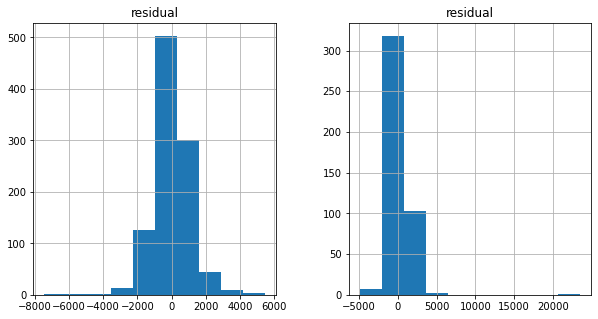

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
pred_error_train.hist(ax=ax[0])
pred_error_valid.hist(ax=ax[1])

array([<AxesSubplot:title={'center':'residual'}>], dtype=object)

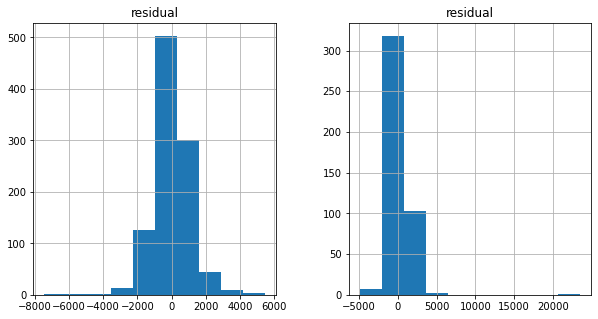

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
pred_error_train.hist(ax=ax[0])
pred_error_valid.hist(ax=ax[1])

<AxesSubplot:title={'center':'residual'}, xlabel='[data_set]'>

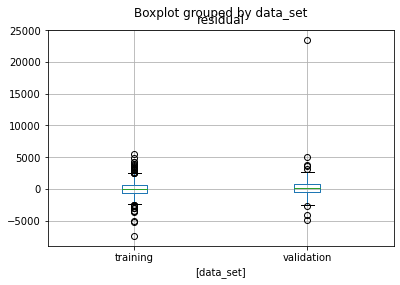

In [46]:
pred_error_both.boxplot(by='data_set')